## Import

In [2]:
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

## 데이터 불러오기
- preprocessing15.csv : 15년2월 - 16년4월 (apart, pps)
- PreprocessingPeriodApartName.csv : 16년2월 - 16년 4월  (apart, pps)
- 2-4월이 겹치는데 2개를 불러온 이유 : 2-4월에 거래가 안된 아파트가 데이터가 존재,
    컬럼명이 아파트명인가 컬럼값이 아파트명인가의 차이 

In [3]:
data = pd.read_csv("../Data/preprocessingData/K_20200414_preprocessing15.csv",encoding='CP949')
apartName = pd.read_csv("../Data/preprocessingData/K_20200414_PreprocessingPeriodApartName.csv",encoding='CP949')

In [4]:
data.tail()
apartName.tail()

,Apart,pps
20922,한신2,502
20923,한신2,451
20924,한신2,540
20925,한영(101),319
20926,한영(104),330


## 데이터 널값 처리 
- 데이터의 원할한 처리를 위한 null값 처리를 위해 전열과 후열의 값을 채워넣는 방향으로 처리

In [5]:
data=data.fillna(method='pad')

In [6]:
data=data.fillna(method='bfill')

## 아파트 시계열데이터 인덱스 및 유일값 설정

In [7]:
data = data.set_index('date')

In [8]:
data = data[apartName['Apart'].unique()]

In [9]:
data.head()

,개포2차현대아파트(220),개포6차우성아파트1동~8동,개포우성3차,개포자이(12-2),개포주공 1단지,개포주공 3단지,개포주공 4단지,개포주공 5단지,개포주공 6단지,개포주공 7단지,...,화성두산아파트,동구햇살아파트101동,미영리치타운,미영리치타운103,범양프레체,중화동건영아파트,청원다미소,태능에셈빌,한영(101),한영(104)
date,,,,,,,,,,,,,,,,,,,,,
2,820.0,1052.0,807.0,830.0,1638,1782,1577,1206.0,1155,1178.0,...,445.0,436.0,418.0,412.0,652.0,323.0,419.0,358.0,331.0,330.0
3,820.0,1052.0,870.0,871.0,1653,1792,1611,1184.0,1193,1179.0,...,445.0,436.0,418.0,412.0,652.0,323.0,419.0,358.0,331.0,330.0
4,820.0,1025.0,856.0,860.0,1649,1764,1602,1184.0,1178,1194.0,...,472.0,436.0,425.0,412.0,652.0,323.0,419.0,390.0,331.0,330.0
5,820.0,1070.0,843.0,860.0,1666,1822,1662,1237.0,1160,1214.0,...,472.0,436.0,425.0,412.0,652.0,323.0,419.0,365.0,331.0,330.0
6,820.0,1013.0,843.0,875.0,1734,1872,1718,1202.0,1182,1192.0,...,478.0,436.0,425.0,412.0,652.0,342.0,419.0,377.0,331.0,330.0


## 개별 수익률 계산

In [10]:
log_data = np.log(data/data.shift(1))
log_data.head()

,개포2차현대아파트(220),개포6차우성아파트1동~8동,개포우성3차,개포자이(12-2),개포주공 1단지,개포주공 3단지,개포주공 4단지,개포주공 5단지,개포주공 6단지,개포주공 7단지,...,화성두산아파트,동구햇살아파트101동,미영리치타운,미영리치타운103,범양프레체,중화동건영아파트,청원다미소,태능에셈빌,한영(101),한영(104)
date,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.000000,0.075170,0.048216,0.009116,0.005596,0.021331,-0.018411,0.032371,0.000849,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,-0.026001,-0.016223,-0.012710,-0.002423,-0.015748,-0.005602,0.000000,-0.012653,0.012642,...,0.058905,0.0,0.016608,0.0,0.0,0.000000,0.0,0.085614,0.0,0.0
5,0.0,0.042966,-0.015303,0.000000,0.010257,0.032351,0.036769,0.043791,-0.015398,0.016612,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.066249,0.0,0.0
6,0.0,-0.054742,0.000000,0.017291,0.040005,0.027073,0.033139,-0.028702,0.018788,-0.018288,...,0.012632,0.0,0.000000,0.0,0.0,0.057158,0.0,0.032348,0.0,0.0


In [11]:
log_data = log_data.dropna() 
log_data.head()

,개포2차현대아파트(220),개포6차우성아파트1동~8동,개포우성3차,개포자이(12-2),개포주공 1단지,개포주공 3단지,개포주공 4단지,개포주공 5단지,개포주공 6단지,개포주공 7단지,...,화성두산아파트,동구햇살아파트101동,미영리치타운,미영리치타운103,범양프레체,중화동건영아파트,청원다미소,태능에셈빌,한영(101),한영(104)
date,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.000000,0.075170,0.048216,0.009116,0.005596,0.021331,-0.018411,0.032371,0.000849,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,-0.026001,-0.016223,-0.012710,-0.002423,-0.015748,-0.005602,0.000000,-0.012653,0.012642,...,0.058905,0.000000,0.016608,0.0,0.0,0.000000,0.0,0.085614,0.0,0.0
5,0.0,0.042966,-0.015303,0.000000,0.010257,0.032351,0.036769,0.043791,-0.015398,0.016612,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.066249,0.0,0.0
6,0.0,-0.054742,0.000000,0.017291,0.040005,0.027073,0.033139,-0.028702,0.018788,-0.018288,...,0.012632,0.000000,0.000000,0.0,0.0,0.057158,0.0,0.032348,0.0,0.0
7,0.0,0.006886,0.058739,0.067392,0.010898,0.068138,0.041055,0.055817,-0.094887,0.064958,...,-0.034046,0.031605,-0.043276,0.0,0.0,-0.023670,0.0,0.000000,0.0,0.0


## 아파트별 평균수익률 계산

In [12]:
mu = log_data.mean() 
mu

개포2차현대아파트(220)    0.007674
개포6차우성아파트1동~8동    0.001611
개포우성3차            0.011124
개포자이(12-2)        0.004664
개포주공 1단지          0.014083
                    ...   
중화동건영아파트          0.013647
청원다미소            -0.003136
태능에셈빌             0.010725
한영(101)          -0.002638
한영(104)           0.000000
Length: 3568, dtype: float64

In [13]:
mu_year = log_data.mean()*13
expect=pd.DataFrame(mu_year)
expect=expect.rename({0:'expect'},axis='columns')

## 평균 위험도 계산

0

In [14]:
risk=log_data.std() * np.sqrt(13)
risk = pd.DataFrame(risk)
risk=risk.rename({0:'risk'},axis='columns')

In [15]:
er=pd.concat([expect,risk],axis=1)
er

,expect,risk
개포2차현대아파트(220),0.099758,0.126664
개포6차우성아파트1동~8동,0.020946,0.093045
개포우성3차,0.144618,0.116537
개포자이(12-2),0.060628,0.167435
개포주공 1단지,0.183085,0.105601
...,...,...
중화동건영아파트,0.177408,0.111506
청원다미소,-0.040773,0.064594
태능에셈빌,0.139427,0.135037
한영(101),-0.034290,0.035584


In [16]:
apartName['pps']=pd.to_numeric(apartName['pps'])
apart = apartName.groupby(apartName['Apart']).mean()

In [17]:
per=pd.concat([apart,er],axis=1)
per

,pps,expect,risk
(1101-1),792.250000,0.132342,0.264974
(145-0),734.000000,0.051944,0.350263
(191-8)중앙궁전빌라트,366.000000,-0.127791,0.132615
(23-42),363.000000,0.000000,0.000000
(323-4),468.000000,0.116091,0.081962
...,...,...,...
힐타워,541.000000,0.116910,0.266030
힐탑,366.000000,0.057564,0.177707
힐탑아파트3차(894-3),293.000000,-0.101946,0.172712
힐탑트레져1동,1252.666667,-0.112313,0.165880


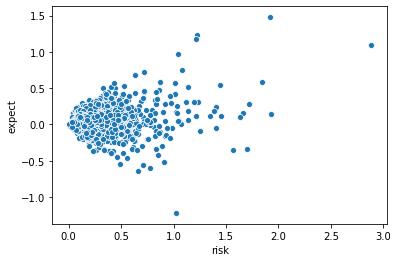

In [18]:
sns.scatterplot(x="risk",y='expect',data=per)

In [19]:
per_plus = per[per['expect']>0]
per_plus

,pps,expect,risk
(1101-1),792.250000,0.132342,0.264974
(145-0),734.000000,0.051944,0.350263
(323-4),468.000000,0.116091,0.081962
(6-19),746.000000,0.043316,0.181819
(66-3),638.000000,0.137819,0.250859
...,...,...,...
힐스테이트,913.500000,0.107766,0.237897
힐스테이트 상도 센트럴파크,827.461538,0.040105,0.193546
힐타워,541.000000,0.116910,0.266030
힐탑,366.000000,0.057564,0.177707


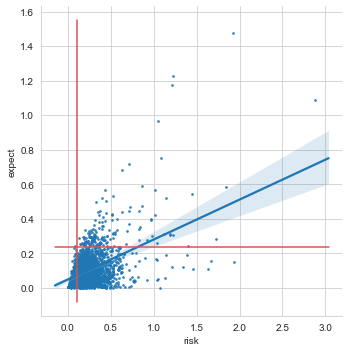

In [20]:
sns.set_style('whitegrid')
sns.lmplot(x="risk",y='expect',data=per_plus,scatter_kws ={'s':3})
xmean = per_plus['risk'].mean()
ymean = per_plus["expect"].mean()

x = plt.gca().axes.get_xlim()
y = plt.gca().axes.get_ylim()

plt.plot(x, len(x)*[xmean], sns.xkcd_rgb["pale red"])
plt.plot(len(y) * [ymean],y, sns.xkcd_rgb["pale red"])
plt.show()

## 고수익 자산 선정
- 상위 5개 아파트 선정

In [57]:
display(per_plus[per_plus["expect"]>0.9])
first_per = per_plus[per_plus["expect"]>0.9]
first_per["class"]=1
first_per
# first_list =p er_plus[per_plus["expect"]>1.4].index.to_list()



,pps,expect,risk
서울,1146.500000,1.226130,1.223946
수정,509.857143,0.964778,1.044576
한양4,1306.000000,1.176167,1.214923
한양5,892.500000,1.474752,1.920816
한양7,702.888889,1.088700,2.882394


,pps,expect,risk,class
서울,1146.500000,1.226130,1.223946,1
수정,509.857143,0.964778,1.044576,1
한양4,1306.000000,1.176167,1.214923,1
한양5,892.500000,1.474752,1.920816,1
한양7,702.888889,1.088700,2.882394,1


## 저위험중 수익률이 높은 자산 선정
- 위험률이 평균보다 작은 자산 중 상위 5개 아파트 선정

In [58]:
per_plus['expect']=round(per_plus['expect'],7)
display(per_plus[per_plus["risk"]<per_plus["risk"].mean()].sort_values(by='expect' ,ascending=False).head(5))
# second_list = per_plus[per_plus["risk"]<per_plus["risk"].mean()].sort_values(by='expect' ,ascending=False).head(5).index.to_list()
second_per = per_plus[per_plus["risk"]<per_plus["risk"].mean()].sort_values(by='expect' ,ascending=False).head(5)
second_per["class"]=2
second_per


,pps,expect,risk
서초포레스타5단지,1013.250000,0.335462,0.194233
우정에쉐르3,996.000000,0.315614,0.228639
뉴타운,432.000000,0.296959,0.182912
마곡경남아너스빌,605.666667,0.295133,0.180320
마곡 태승훼미리아파트,464.000000,0.289228,0.126376


,pps,expect,risk,class
서초포레스타5단지,1013.250000,0.335462,0.194233,2
우정에쉐르3,996.000000,0.315614,0.228639,2
뉴타운,432.000000,0.296959,0.182912,2
마곡경남아너스빌,605.666667,0.295133,0.180320,2
마곡 태승훼미리아파트,464.000000,0.289228,0.126376,2


In [59]:
sum_per = pd.concat([first_per,second_per])
sum_per

,pps,expect,risk,class
서울,1146.500000,1.226130,1.223946,1
수정,509.857143,0.964778,1.044576,1
한양4,1306.000000,1.176167,1.214923,1
한양5,892.500000,1.474752,1.920816,1
한양7,702.888889,1.088700,2.882394,1
서초포레스타5단지,1013.250000,0.335462,0.194233,2
우정에쉐르3,996.000000,0.315614,0.228639,2
뉴타운,432.000000,0.296959,0.182912,2
마곡경남아너스빌,605.666667,0.295133,0.180320,2
마곡 태승훼미리아파트,464.000000,0.289228,0.126376,2


In [60]:
sum_list = sum_per.index.to_list()
sum_list

['서울',
 '수정',
 '한양4',
 '한양5',
 '한양7',
 '서초포레스타5단지',
 '우정에쉐르3',
 '뉴타운',
 '마곡경남아너스빌',
 '마곡 태승훼미리아파트']

In [65]:
data[sum_list].corr()

,서울,수정,한양4,한양5,한양7,서초포레스타5단지,우정에쉐르3,뉴타운,마곡경남아너스빌,마곡 태승훼미리아파트
서울,1.000000,0.309590,0.978636,0.195953,-0.151564,0.725722,0.867735,0.638076,0.849182,0.750414
수정,0.309590,1.000000,0.420460,0.415666,0.569113,0.418378,0.336848,0.650947,0.439230,0.516494
한양4,0.978636,0.420460,1.000000,0.244177,-0.025889,0.701451,0.824706,0.675156,0.819138,0.761453
한양5,0.195953,0.415666,0.244177,1.000000,0.243012,0.225115,0.463940,0.573101,0.375010,0.576072
한양7,-0.151564,0.569113,-0.025889,0.243012,1.000000,-0.127150,-0.114221,0.248512,-0.121612,0.031811
서초포레스타5단지,0.725722,0.418378,0.701451,0.225115,-0.127150,1.000000,0.790151,0.511727,0.906354,0.856298
우정에쉐르3,0.867735,0.336848,0.824706,0.463940,-0.114221,0.790151,1.000000,0.680842,0.964354,0.857020
뉴타운,0.638076,0.650947,0.675156,0.573101,0.248512,0.511727,0.680842,1.000000,0.661504,0.719350
마곡경남아너스빌,0.849182,0.439230,0.819138,0.375010,-0.121612,0.906354,0.964354,0.661504,1.000000,0.885434
마곡 태승훼미리아파트,0.750414,0.516494,0.761453,0.576072,0.031811,0.856298,0.857020,0.719350,0.885434,1.000000


## 상관관계가 작은 2개 아파트 선정

In [90]:
minCorr=1
A=""
B=""
for i in first_list:
    for j in second_list:
        Corr1 = data[[i,j]].corr().iloc[0,1]
        if Corr1<minCorr:
            minCorr=Corr1
            A=i
            B=j
print(A)
print(B)
print(minCorr)


한양5
서초포레스타5단지
0.22511506729552178


In [82]:
choise = sum_per.loc[[A,B]]
choise

,pps,expect,risk,class
한양5,892.50,1.474752,1.920816,1
서초포레스타5단지,1013.25,0.335462,0.194233,2


## 포트폴리오 평균 기대값과 평균 위험율


In [89]:
W1 = choise.iloc[0,0]/(choise.iloc[0,0]+choise.iloc[1,0])
W2 = choise.iloc[1,0]/(choise.iloc[0,0]+choise.iloc[1,0])

exp = W1*choise.iloc[0,1]+W2*choise.iloc[1,1]
exp

0.8690139842975206

In [95]:
ri1 = choise.iloc[0,2]
ri2 = choise.iloc[1,2]

ris = (W1**2)*(ri1**2)+(W2**2)*(ri2**2)+2*W1*W2*minCorr*ri1*ri2
ris

0.8616902782004574

## 포트폴리오 기대 수익률 계산(만원)

In [96]:
(choise.iloc[0,0]+choise.iloc[1,0])*exp

1656.123400575

## 실제 포트폴리오 수익률과 비교